# Clase 17: Patrones de Puntos

En este ejercicio, analizaremos los patrones espaciales de los arriendos de AirBnB en la ciudad de Beijing. En base los datos de ubicación de arriendos, podemos analizad preguntas como:
- ¿Existe un patrón de aglomeración en la ubicación de los arriendos, o estos se distribuyen aleatoriamente en la ciudad?
- Si es que hay aglomraciones, ¿dónde se ubican?



## Datos.



In [1]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import pysal as ps
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
import pointpats

/Users/paguirre/anaconda3/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
/Users/paguirre/anaconda3/lib/python3.6/site-packages/numba/decorators.py:29: NumbaDeprecationWarning: autojit is deprecated, use jit instead, which provides the same functionality. For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-numba-autojit
  warnings.warn(NumbaDeprecationWarning(msg))


In [2]:
abb = pd.read_csv("listings.csv")
abb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34400 entries, 0 to 34399
Data columns (total 16 columns):
id                                34400 non-null int64
name                              34399 non-null object
host_id                           34400 non-null int64
host_name                         34393 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     34400 non-null object
latitude                          34400 non-null float64
longitude                         34400 non-null float64
room_type                         34400 non-null object
price                             34400 non-null int64
minimum_nights                    34400 non-null int64
number_of_reviews                 34400 non-null int64
last_review                       20961 non-null object
reviews_per_month                 20961 non-null float64
calculated_host_listings_count    34400 non-null int64
availability_365                  34400 non-null int64
dt

In [3]:
url = ("http://data.insideairbnb.com/china/beijing/beijing/"\
       "2019-08-15/visualisations/neighbourhoods.geojson")
url
neis = gpd.read_file(url)
neis=neis.to_crs('EPSG:32650')
neis

,neighbourhood,neighbourhood_group,geometry
0,东城区,None,"MULTIPOLYGON (((452327.065 4417006.906, 452340..."
1,西城区,None,"MULTIPOLYGON (((447985.265 4416513.244, 447986..."
2,昌平区,None,"MULTIPOLYGON (((418388.113 4437525.917, 417939..."
3,大兴区 / Daxing,None,"MULTIPOLYGON (((477232.470 4385793.615, 474150..."
4,房山区,None,"MULTIPOLYGON (((435496.415 4404922.555, 435198..."
5,怀柔区 / Huairou,None,"MULTIPOLYGON (((438796.990 4470155.628, 438837..."
6,门头沟区 / Mentougou,None,"MULTIPOLYGON (((376997.315 4407885.797, 376881..."
7,密云县 / Miyun,None,"MULTIPOLYGON (((490094.876 4516212.293, 490853..."
8,平谷区 / Pinggu,None,"MULTIPOLYGON (((532439.229 4452845.718, 532589..."
9,延庆县 / Yanqing,None,"MULTIPOLYGON (((438796.990 4470155.628, 438791..."


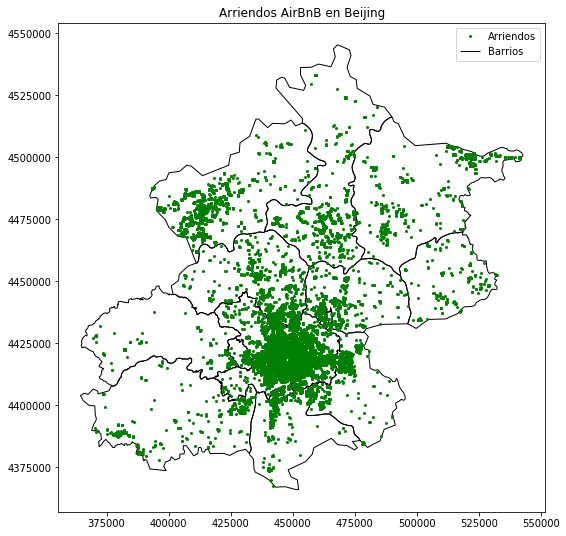

In [9]:
#Creamos un GeoDataFrame con geometria de puntos a partir de los datos de arriendos
db = gpd.GeoDataFrame(abb, geometry=gpd.points_from_xy(abb.longitude, abb.latitude),crs='EPSG:4326')
db=db.to_crs('EPSG:32650')

db['x']=db.centroid.x
db['y']=db.centroid.y
data_extent = [db.x.min(), db.x.max(), db.y.min(), db.y.max()]

# Extraemos el bounding box d elos datos
bounding_box = [db.x.min(), db.y.min(), db.x.max(), db.y.max()]

# Creamos una figura y ejes
f, ax = plt.subplots(1, figsize=(9, 9))

# Graficamos los puntos (ubicaciones de arriendos) y barrios de Beijing
ax.plot(db['x'], db['y'], '.',markersize=4,color='g',label='Arriendos')
neis.boundary.plot(ax=ax,color='k',lw=1,label='Barrios')
ax.legend()
ax.set_title('Arriendos AirBnB en Beijing')
# Display
plt.show()




- Llamamos al método `knn` en la clase `PointPattern` para encontrar los $k$ vecinos más cercanos a cada punto en el patrón `pp`.


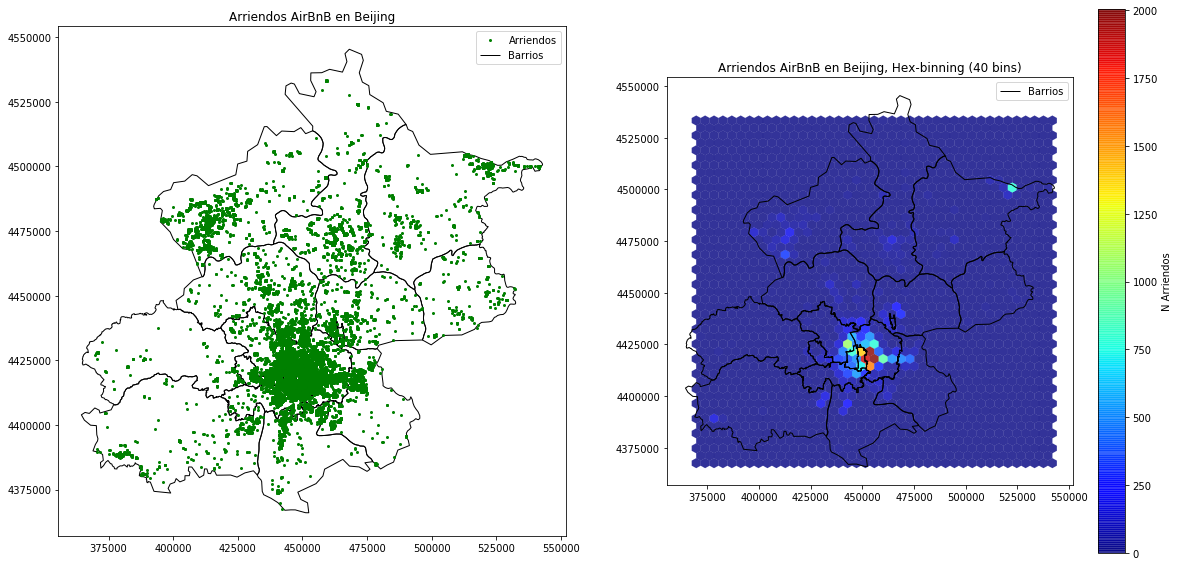

In [26]:
# Set up figure and axis
f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.plot(db['x'], db['y'], '.',markersize=4,color='g',label='Arriendos')
neis.boundary.plot(ax=ax1,color='k',lw=1,label='Barrios')
ax1.legend()
ax1.set_title('Arriendos AirBnB en Beijing')

# Generamos y graficamos grillado hexagonal de los puntos correspondientes a ubicaciones de arriendos 
nhex=40 
hb = ax2.hexbin(db['x'], db['y'],gridsize=nhex, linewidths=0.1,alpha=0.8, cmap='jet')
neis.boundary.plot(ax=ax2,color='k',lw=1,label='Barrios')
ax2.legend()
ax2.set_title('Arriendos AirBnB en Beijing, Hex-binning (%d bins)'%nhex)

# Add colorbar
plt.colorbar(hb,label='N Arriendos')


El primer arreglo contiene el $id$ de vecino más cercano a cada punto, y el segundo arreglo contiene la distancia a este vecino más cercano.

Text(0.5, 1, 'Arriendos AirBnB en Beijing, KDE')

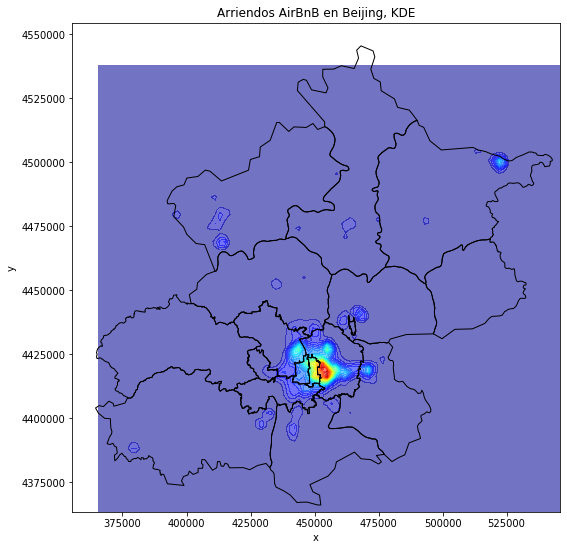

In [40]:

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Generar y graficar KDE con nlevel niveles de contorno
nlevel=40
cb=sns.kdeplot(db['x'], db['y'],n_levels=nlevel, shade=True,alpha=0.55, cmap='jet',ax=ax,legend=True)
neis.boundary.plot(ax=ax,color='k',lw=1,label='Barrios')

# Add colorbar
ax.set_title('Arriendos AirBnB en Beijing, KDE')




Point Pattern
34400 points
Bounding rectangle [(369657.00163094414,4367596.925293095), (541871.9515216321,4533281.542671563)]
Area of window: 28533368079.490623
Intensity estimate for window: 1.205606008521869e-06
               x             y
0  453119.576916  4.416251e+06
1  514560.453812  4.503731e+06
2  454155.472431  4.417341e+06
3  454289.341638  4.417285e+06
4  454436.266373  4.417410e+06
Data points: None
369657.00163094414 4367596.925293095 541871.9515216321 4533281.542671563 34400
Point Pattern
34400 points
Bounding rectangle [(369663.61374270596,4367597.367117058), (541870.3090292246,4533278.963852137)]
Area of window: 28531480243.54174
Intensity estimate for window: 1.20568577957979e-06
               x             y
0  371005.128978  4.382762e+06
1  472722.224697  4.376219e+06
2  449729.047036  4.489529e+06
3  530040.673595  4.498429e+06
4  518168.805745  4.432552e+06
Random points: None


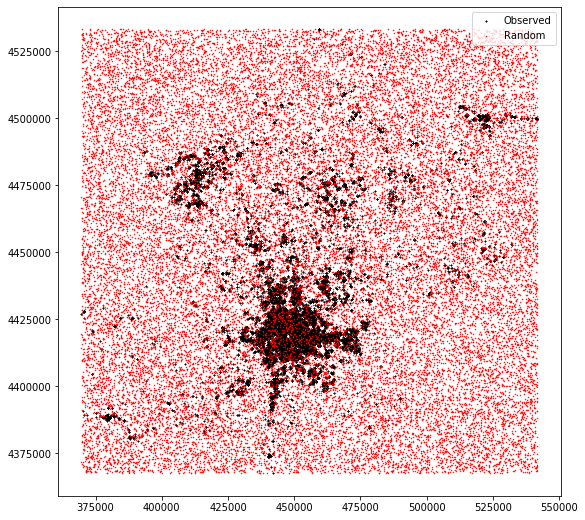

In [45]:
from pointpats import distance_statistics, QStatistic, random, PointPattern
import sys

#Generamos un objeto PointPattern en base a los datos (Pysal)
points=np.array([[x,y] for x,y in zip(db.x,db.y)])
pp = PointPattern(points)
print('Data points:',pp.summary())

#Generamos un objeto PointPattern para un conjunto aleatorio de puntos
l, b, r, t = db.x.min(), db.y.min(), db.x.max(), db.y.max()
n=len(points)
print(l,b,r,t,n)

xs = np.random.uniform(l, r, (n, 1))
ys = np.random.uniform(b, t, (n, 1))
points_rand=[[x[0],y[0]] for x,y in zip(xs,ys)]
pprand = PointPattern(points_rand)
print('Random points:',pprand.summary())

# Graficamos ambos conjuntos
f, ax = plt.subplots(1, figsize=(9, 9))
#Datos
ax.scatter(db['x'], db['y'], marker='x',color='k',label='Observed',s=1)
#Random
ax.scatter(xs,ys,  marker='.',color='r',label='Random',s=1)
ax.legend()
plt.show()


In [46]:
#Calculamos nearest neighbors para observaciones y conjunto aleatorio
knnobs=pp.knn()
dist_nn=knnobs[1]
print(dist_nn.mean())

knn_rand=pprand.knn()
dist_nn_rand=knn_rand[1]

90.04665403777601


In [48]:
print('Distancia mínimas entre vecinos más cercanos (data,random):',pp.min_nnd,pprand.min_nnd)
print('Distancia máximas entre vecinos más cercanos (data,random):',pp.max_nnd,pprand.max_nnd)
print('Distancia promedio entre vecinos más cercanos (data,random):',pp.mean_nnd,pprand.mean_nnd)


Distancia mínimas entre vecinos más cercanos (data,random): 0.0 1.7362415665557995
Distancia máximas entre vecinos más cercanos (data,random): 9706.174203795648 1836.1015449708957
Distancia promedio entre vecinos más cercanos (data,random): 90.04665403777601 457.20558337618695


## Quadrat Statistics

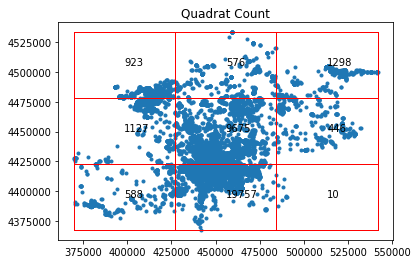

0.0


In [55]:
from pointpats import distance_statistics, QStatistic, random, PointPattern
from pointpats import PoissonPointProcess as csr

csr_process = csr(pp.window, pp.n, 99, asPP=True)


#Distribucion observada de puntos
qstat = QStatistic(pp,shape= "rectangle",nx = 3, ny = 3, realizations = csr_process)
qstat.plot()
print(qstat.chi2_pvalue)



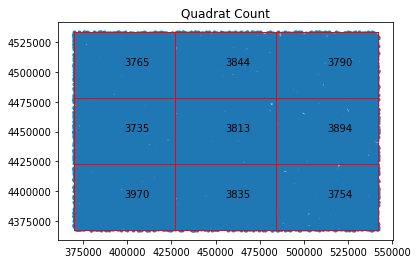

0.1706107200757397


In [52]:
qstat_null = QStatistic(np.array(points_rand))
qstat_null.plot()
print(qstat_null.chi2_pvalue)

The pseudo p-value is 0.002, which is smaller than 0.05. Thus, we reject the null at the 95%

confidence level.


## Función G:

In [56]:

points=np.array([[x,y] for x,y in zip(db.x,db.y)])
pp = PointPattern(points)
pp.summary()

Point Pattern
34400 points
Bounding rectangle [(369657.00163094414,4367596.925293095), (541871.9515216321,4533281.542671563)]
Area of window: 28533368079.490623
Intensity estimate for window: 1.205606008521869e-06
               x             y
0  453119.576916  4.416251e+06
1  514560.453812  4.503731e+06
2  454155.472431  4.417341e+06
3  454289.341638  4.417285e+06
4  454436.266373  4.417410e+06


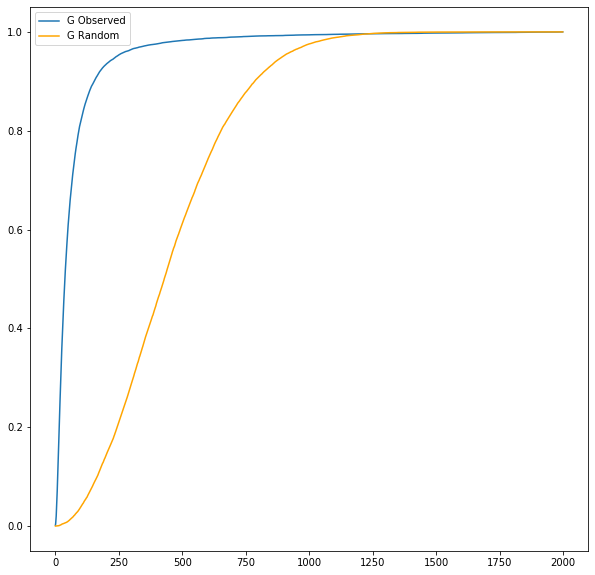

In [57]:
from pointpats import distance_statistics, QStatistic, random, PointPattern, Window
from libpysal.cg import shapely_ext

fig,ax1 = plt.subplots(1,1, figsize=(10,10),sharey=True)

d_array=np.arange(0,2000,1)

#Observados
nndist_obs=np.array(knnobs[1])
counts, bins = np.histogram(nndist_obs, bins=d_array)
fracs = np.cumsum(counts) / counts.sum()
ax1.plot(d_array[0:-1],fracs,label='G Observed')    
    

#Random
nndist=np.array(knn_rand[1])
counts, bins = np.histogram(nndist, bins=d_array)
fracs = np.cumsum(counts) / counts.sum()
ax1.plot(d_array[0:-1],fracs,label='G Random',color='orange')
    
ax1.legend()



## Identificación de Clusters

The previous two sections on exploratory spatial analysis of point patterns provides methods to characterize whether point patterns are dispersed or clustered in space. However, knowing that a point pattern is clustered does not necessarily give us information about where that cluster resides. To do this, we must learn a method to identify clusters of points, based on their density across space.

There are many spatial point clustering algorithms. Here, will cover the widely used DBSCAN algorithm. For this method, a cluster is a concentration of at least m points, each of them within a distance of r of at least another point in the cluster. Points in the dataset are then divided into three categories:

    Noise, for those points outside a cluster.

    Cores, for those points inside a cluster whith at least m points in the cluster within distance r.

    Borders for points inside a cluster with less than m other points in the cluster within distance r.

Both m and r need to be prespecified by the user before running DBSCAN. This is a critical point, as their value can influence significantly the final result. Before exploring this in greater depth, let us get a first run at computing DBSCAN in Python.

In [72]:
# Compute DBSCAN
from sklearn.cluster import dbscan
minp=np.round(db.shape[0] * 0.01) #1% del total de puntos
cs, lbls = dbscan(db[['x', 'y']],eps=500, min_samples=minp)

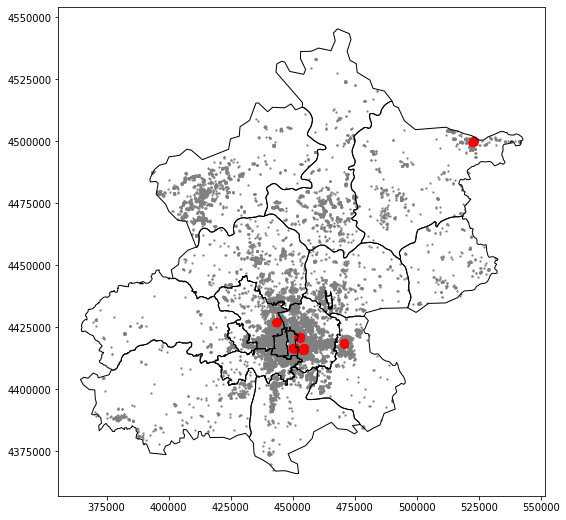

In [73]:
lbls = pd.Series(lbls, index=db.index)

# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Subset points that are not part of any cluster (noise)
noise = db.loc[lbls==-1, ['x', 'y']]

# Plot noise in grey
ax.scatter(noise['x'], noise['y'], c='grey', s=5, linewidth=0)
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (tw) and substract from
#      it the index of those that are noise
ax.scatter(db.loc[db.index.difference(noise.index), 'x'], 
           db.loc[db.index.difference(noise.index), 'y'],c='red', linewidth=0)
neis.boundary.plot(ax=ax,color='k',lw=1,label='Barrios')


# Display the figure
plt.show()